# Classification on Adult Dataset

In [237]:
import pandas as pd #dataset manipulation library
import numpy as np #used for turning data into array and its calculation
import matplotlib.pyplot as plt #for data visualization
import seaborn as sn #for data visualization
import warnings
from sklearn import preprocessing

warnings.simplefilter(action='ignore', category=FutureWarning)

### Getting the Data

In [238]:
data = pd.read_csv('./salary.csv')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Understanding the data 

In [239]:
print("Shape\n"+str(data.shape)+'\n')
print("Columns")
print(data.columns)
data.describe()

Shape
(32561, 15)

Columns
Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


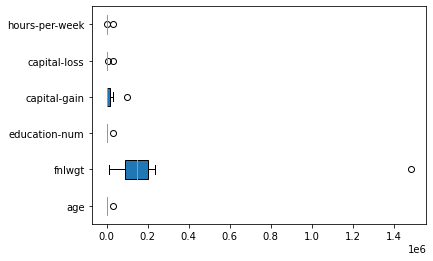

In [240]:
plt.boxplot(data.describe(),patch_artist=True,vert=0,labels=list(data.describe().columns))
plt.show()

### Analysis

age: The min and max are reasonable and there seems no outliers. Standard deviation is small.

education-num: The min and max are reasonable and there seems no outliers. Standard deviation is small.

hours-per-week: The min and max are reasonable and there seems no outliers. Standard deviation is small.

capital-gain: Chances of getting outlier since there is a huge gap between 75% and max.

capital-loss: Chances of getting outlier since there is a huge gap between 75% and max.

fnlwgt: Looking at the boxplot, there is defintely an outlier in fnlwgt.

Out of 15 features, only 6 are numerical.

### Note:

fnlwgt — The weight assigned to the combination of features (an estimate of how many people belong to this set of combination)

(Ref: https://medium.com/analytics-vidhya/machine-learning-application-census-income-prediction-868227debf12)

In [241]:
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
salary            object
dtype: object

### Checking for Missing Values 

In [242]:
print("Checking for N/A:",data.isna().sum().sum()) # there seems to be no N/A
print("Checking for null:",data.isnull().sum().sum()) # there seems to be no null values

Checking for N/A: 0
Checking for null: 0


In [243]:
for i in data.columns:
    print(i,"\n",data[i].unique()) #checks the unique values present in each features
    print()

age 
 [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]

workclass 
 [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']

fnlwgt 
 [ 77516  83311 215646 ...  34066  84661 257302]

education 
 [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']

education-num 
 [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]

marital-status 
 [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']

occupation 
 [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-

It seems that missing values are added as ' ?'

#### What are the features that contain ' ?' and how many missing values?

In [244]:
missing_col = [] #columns that contain the missing values
for i in data.columns:
    if ' ?' in data[i].unique():
        # Gives the columns that contain missing values and their numbers
        print(i+": Missing Value ("+str(data[i].value_counts()[' ?'])+")") 
        missing_col.append(i) #appending columns with missing values

workclass: Missing Value (1836)
occupation: Missing Value (1843)
native-country: Missing Value (583)


#### Changing the missing value 

In [245]:
data[missing_col].head()

,workclass,occupation,native-country
0,State-gov,Adm-clerical,United-States
1,Self-emp-not-inc,Exec-managerial,United-States
2,Private,Handlers-cleaners,United-States
3,Private,Handlers-cleaners,United-States
4,Private,Prof-specialty,Cuba


### Changing categorical data to numerical

In [246]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [247]:
data = data.drop('education',axis=1) #deleted the column 'education' as education-num serves the same purpose
data.head(5)

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [248]:
LE = preprocessing.LabelEncoder() #using Label Encoder
LE.fit(data['sex'])
data.insert(loc=8, column='gender', value=LE.transform(data['sex'])) #adding 'gender' to column index 8
data = data.drop('sex',axis=1)# added numerical 'gender' and deleted categorical 'sex'
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
gender             int32
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
salary            object
dtype: object

### Dealing with missing values
 - remove the rows that contain the missing values (data_imp_del)
 - fill missing values to median values (I prefer not to use mean values because having outliers might affect it) (data_imp_med)
 - fill the missing values using 'from sklearn.impute import KNNImputer' (data_imp_knn)

In [249]:
data = data.replace(' ?',np.nan) #replacing ' ?' as N/A to ease the replace

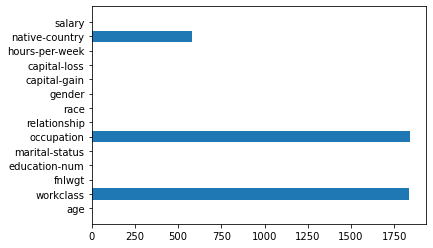

In [250]:
isna_check = data.isna().sum().reset_index() #checking for na; if we replaced ' ?' correctly, we should see na values
plt.barh(isna_check['index'], isna_check[0])
plt.show()

In [251]:
# in this dataset, we deleted the rows that contained the N/A values
data_imp_del = data.dropna() #drops rows containing na
print('Inital data:',data.shape) #intial dataset without any deleted rows
print('Final Data after deleted rows:',data_imp_del.shape) # final dataset after using dropna
print("Deleted rows:",data.shape[0]-data_imp_del.shape[0],end='\n\n')
print(data_imp_del.isna().sum()) #display if na is present
data[missing_col].dtypes
data.median()

Inital data: (32561, 14)
Final Data after deleted rows: (30162, 14)
Deleted rows: 2399

age               0
workclass         0
fnlwgt            0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
gender            0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64


age                   37.0
fnlwgt            178356.0
education-num         10.0
gender                 1.0
capital-gain           0.0
capital-loss           0.0
hours-per-week        40.0
dtype: float64

In [252]:
# in this dataset, we replace missing (N/A) values with median values; need to change data to numerical from categorical
data_imp_med = data.fillna(data.median()) #replace missing values with median values
print('Inital data:',data.shape) #intial dataset
print('Final data:',data_imp_med.shape) # final dataset after imputting
print("Deleted rows:",data.shape[0]-data_imp_med.shape[0],end='\n\n')
print(data_imp_med.isna().sum()) #display if na is present
data[missing_col].dtypes

Inital data: (32561, 14)
Final data: (32561, 14)
Deleted rows: 0

age                  0
workclass         1836
fnlwgt               0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
gender               0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64


workclass         object
occupation        object
native-country    object
dtype: object